<div style="display: flex; align-items: center; justify-content: space-between;">
    <h1 style="font-size: 65px;">Mission: <br> Escape No Game</h1>
    <img src="agence.png" alt="agence logo" style="height: 150px; margin-right: 10px; margin-top: 0px;">
</div>
<div style="display: flex; justify-content: space-between; align-items: center; width: 100%;">
    <p>Benjamin <strong>COUSIN</strong></p>
  <p style="margin-right: 40px; margin-top: 0px;"><strong>Département: R&D | 2024-2025</strong></p>
</div>
<hr style="background-color: #77B5FE; height: 2px; border: none;">
<br>
<div style="display: flex; width: 98%;">
    <p style="font-size: 25px; text-align: justify;">Suite au décès de l'agent K57 durant une mission d'infiltation, où il s'est retrouvé isolé dans une pièce en territoire ennemis sans moyen de communication, le pôle recherche et développement de l'agence est chargé de trouvé un moyen pour que cela ne se reproduise plus. L'agent avait comme seul élément a sa disposition: sa tablette de mission et un micro branché au système d'audioconférence connecté au réseau de la base ennemis.</p>
</div>
<center><h2 style="font-size: 35px;"><u>Problématique:</u></h2></center>
<center><p style="font-size: 25px; text-align: center;">Comment l'agent aurait pu communiquer avec l'agence sans que le message soit intercepter et qu'il ne se fasse repérer ?</p></center>
<center><h2 style="font-size: 33px;"><u>Matériel à disposition:</u></h2></center>

<div style="display: flex; align-items: center; justify-content: center; gap: 400px;">
    <img src="tablette.png" alt="tablette logo" style="height: 200px; margin-left: 5px;">
    <img src="micro.png" alt="micro logo" style="height: 200px; margin-right: 50px;">
</div>
<div style="display: flex; justify-content: space-between; align-items: center; width: 100%;">
    <p style="font-size: 25px; margin-left: 420px;"><strong>La tablette de l'agent</strong></p>
    <p style="font-size: 25px; margin-right: 390px; margin-top: 0px;"><strong>Un micro en réseau</strong></p>
</div>
<br>
<center><h2 style="font-size: 33px;"><u>Solution proposé:</u></h2></center>
<div style="display: flex; width: 98%;">
    <p style="font-size: 25px; text-align: justify;">L'idée est de transformer un message textuel en un signal sonore spécifique grace à la tablette, puis le système d'audioconférence peut ensuite capter et relayer le signal sur le réseau lorsque celui-ci est actif. Ce signal peut ensuite être intercepté puis décoder par l'agence sans que les cybercriminels ne se doute de rien puisque c'est directement depuis leurs propres réseaux.</p>
</div>
<br>
<br>
<center><h2><u>Transmission:</u></h2></center>
<div style="display: flex; align-items: center; justify-content: center; gap: 40px;">
    <img src="2.png" alt="tablette logo" style="height: 1000px;">
    <img src="3.png" alt="micro logo" style="height: 1000px;">
</div>
<hr style="background-color: #77B5FE; height: 2px; border: none;">


<div style="display: flex; width: 98%;">
    <p style="font-size: 25px; text-align: justify;">Afin d'afficher les graphiques les plus clairs et esthétiques possibles nous réalisons au préalable une fonction d'affichage de style que l'on nomme graphique.</p>
</div>

In [1]:
def graphique(ax):
    ax.set_facecolor("#1f1f1f")
    ax.spines["top"].set_color("white")
    ax.spines["bottom"].set_color("white")
    ax.spines["left"].set_color("white")
    ax.spines["right"].set_color("white")
    ax.tick_params(axis="x", colors="white") 
    ax.tick_params(axis="y", colors="white")
    ax.xaxis.label.set_color("white")
    ax.yaxis.label.set_color("white")

<center><p style="font-size: 35px;"><u>On souhaites pour commencer obtenir le signal binaire et sa représentation graphique</u></p></center>
<center><p style="font-size: 25px;">Avant tout on importe les bibliothèques nécessaire au développement du projet:</p></center>



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import scipy.signal as signal
from scipy.io.wavfile import write
import wave
import struct
import soundfile as sf


<center><h2 style="font-size: 35px;"><u>Première étape:</u></h2></center>
<center><p style="font-size: 25px;">On définis la fonction qui permet de transformer notre message d'aide en code binaire via le code ASCII:</p></center>


In [3]:
def texte_to_binaire(texte):
    resultat = []
    for lettre in texte:
        temp = format(ord(lettre), '08b')   # Convertir la lettre en norme ASCII puis en binaire sur 8 bits
        resultat.append(temp)
    return ''.join(resultat)

<center><h2 style="font-size: 35px;"><u>Deuxième étape:</u></h2></center>
<center><p style="font-size: 25px;">On souhaites obtenir le signal binaire.</p></center>
<div style="display: flex; width: 98%;">
    <p style="font-size: 25px; text-align: justify;">Pour cela nous devons échantilloné le signal car bien que le signal ai des valeurs discrète en amplitude (0 et 1) le temps quant-à lui est continu. Nous devons donc le transphormé en une série de points discret pour que celui-ci soit compris et lu par l'ordinateur.</p>
</div>
<center><h2 style="font-size: 25px;">Fréquence d'échantillonage choisi: 44100 Hz</h2></center>
<center><h2 style="font-size: 25px;">Duration: 0,002 s</h2></center>

In [4]:
echantillonage = 44100
duree_bit = 0.01
def signal_binaire(binaire, duree_bit, echantillonage):
    signal = []
    temps = []
    for i, bit in enumerate(binaire):
        valeur = 1 if bit == '1' else 0                          
        t = np.linspace(                                         # On échantillone le temps
            i * duree_bit,                                       # Temps de début
            (i + 1) * duree_bit,                                 # Temps de fin
            int(echantillonage * duree_bit),           # Nombre d'échantillons
            endpoint=False)                                      # Exclure le dernier pour pas dépasser
        signal.extend([valeur] * len(t))                         # Mettre nombre de bit correspondant à l'échantillon
        temps.extend(t)
    return np.array(temps), np.array(signal)

<center><h2 style="font-size: 35px;"><u>Troisème étape:</u></h2></center>
<center><p style="font-size: 25px;">Désormais on définis notre fonction pour afficher le graphique:</p></center>

In [5]:
def graphique_binaire(temps, signal):
    plt.figure(figsize=(20, 5), facecolor="#1f1f1f")
    plt.step(temps, signal, label="Signal binaire")
    plt.title("Message en binaire", color="white")
    plt.xlabel("Temps (s)")
    plt.ylabel("Amplitude (V)")
    plt.legend()
    ax = plt.gca()
    graphique(ax)

<center><h2 style="font-size: 35px;"><u>Quatrième étape:</u></h2></center>
<center><p style="font-size: 25px;">Il nous reste maintenant à définir notre fonction pour jouer le son:</p></center>

In [6]:
def son_binaire(signal, echantillonage):
    signal_normaliser = (signal - np.min(signal)) / (np.max(signal) - np.min(signal)) * 2 - 1           # Normaliser le signal pour qu'il soit entre -1.0 et 1.0 pour le son
    sd.play(signal_normaliser, samplerate=echantillonage)
    sd.wait()

<center><h2 style="font-size: 35px;"><u>Cinquème étape:</u></h2></center>
<center><p style="font-size: 25px;">Pour finir on appelle toutes nos fonctions qu'on a défini:</p></center>

Texte en binaire : 0100000100100000011011000010011101100001011010010110010001100101


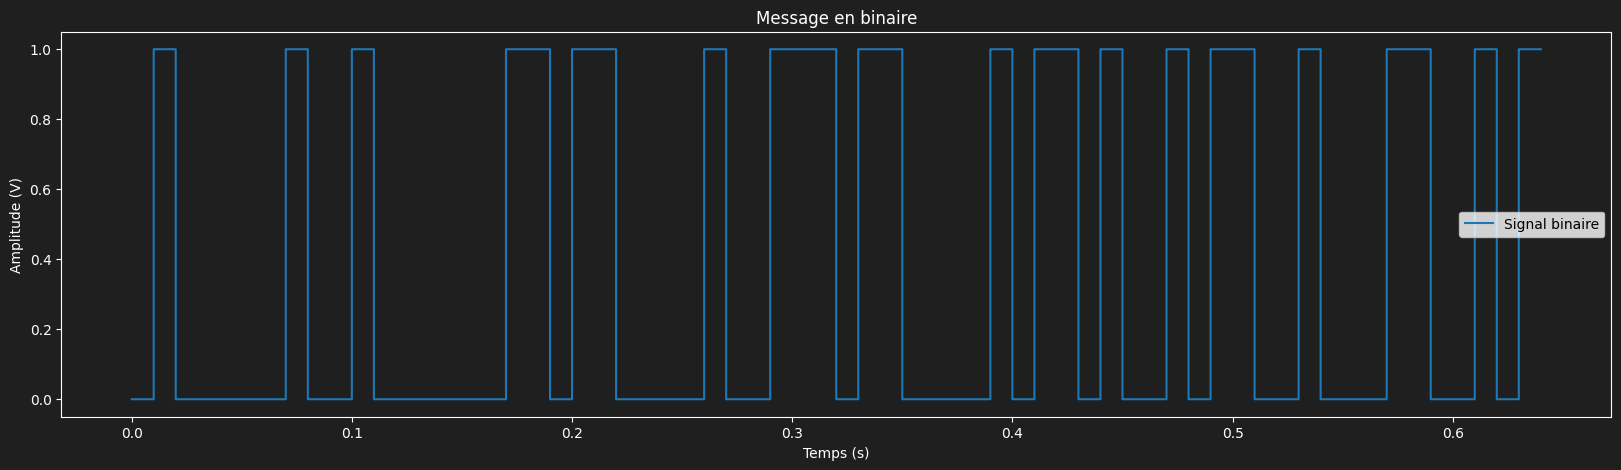

In [7]:
texte = "A l'aide"
binaire = texte_to_binaire(texte)
print("Texte en binaire :", binaire)
temps, signal = signal_binaire(binaire, duree_bit, echantillonage)
graphique_binaire(temps, signal)
#son_binaire(signal, echantillonage=1000)

##
<div style="display: flex; width: 98%;">
    <p style="font-size: 25px; text-align: justify;">Nous avons obtenu notre signal binaire, malhreuseusemnt il est très compliqué d'émettre un signal comme celui-ci modulé, effectivement on peut rencontrés plusieurs problème: perte de synchronisation au niveau du récepteur, une ligne coupé dû à une rafale de 0 et un affaiblissement dû signal dû à une moyenne non nul.</p>
</div>
<div style="display: flex; width: 98%;">
    <p style="font-size: 25px; text-align: justify;">Pour palier à ce problème nous allons donc utiliser le codage Manchester, celui-ci consiste à modéliser un '1' par un changement de signal vers le bas et un '0' par un changement de signal vers le haut sur la moitié d'un bit. C'est le codage le plus utilisé dans les réseaux informatiques pour injecter sur le média physique. Voici une fonction permettant de codé un message binaire avec le codage Manchester et d'en afficher son signal, on utilise encore le même principe d'échantillonage.</p>
</div>
<center><h2 style="font-size: 35px;"><u>Code Manchester:</u></h2></center>


Message binaire d'origine : 0100000100100000011011000010011101100001011010010110010001100101
Message codé en Manchester : 01100101010101100101100101010101011010011010010101011001011010100110100101010110011010011001011001101001011001010110100101100110


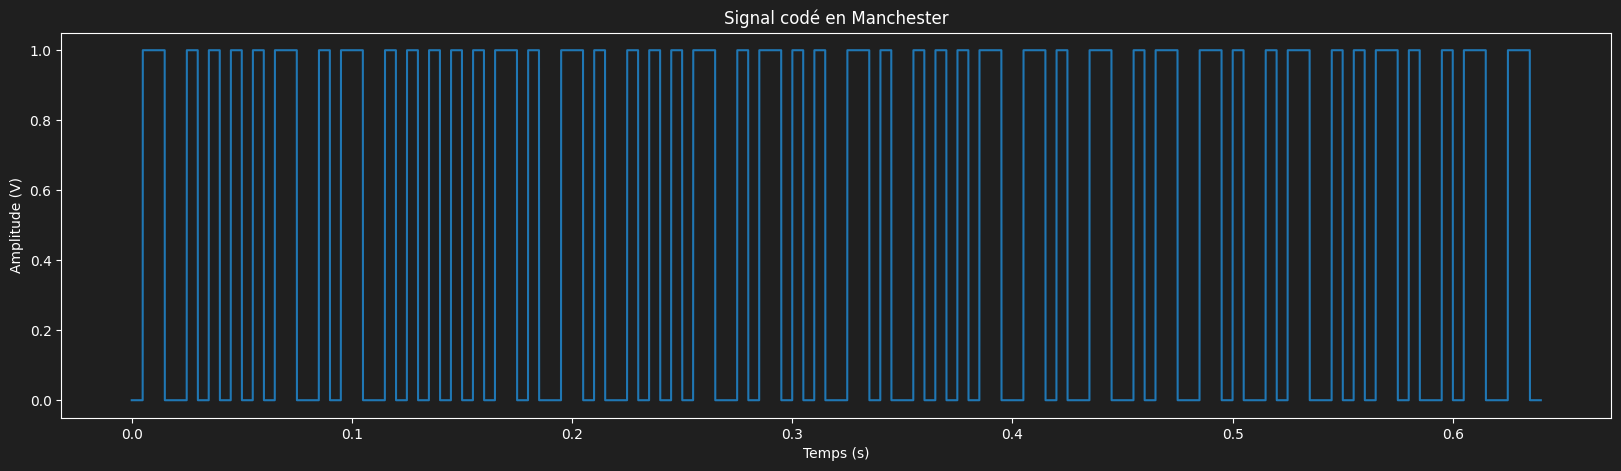

In [8]:
def code_manchester(binaire, duree_bit, echantillonage):
    signal = []
    temps = []
    manchester = ""
    for i, bit in enumerate(binaire):
        t = np.linspace(                                         # On échantillone le temps       
            i * duree_bit,                                       # Temps de début
            (i + 1) * duree_bit,                                 # Temps de fin
            int(echantillonage * duree_bit),           # Nombre d'échantillons
            endpoint=False)                                      # Exclure le dernier pour pas dépasser
        
        moitie_bit = len(t) // 2
        if bit == '1':
            # Transition bas à haut (0 → 1)
            bit_signal = [1] * moitie_bit + [0] * (len(t) - moitie_bit)
            manchester += "10"
        else:
            # Transition haut à bas (1 → 0)
            bit_signal = [0] * moitie_bit + [1] * (len(t) - moitie_bit)
            manchester += "01"
        signal.extend(bit_signal)
        temps.extend(t)
        
    print(f"Message binaire d'origine : {binaire}")
    print(f"Message codé en Manchester : {manchester}")
    return np.array(temps), np.array(signal), manchester


temps, signal_manchester, manchester = code_manchester(binaire, duree_bit, echantillonage)
plt.figure(figsize=(20, 5), facecolor="#1f1f1f")
plt.plot(temps, signal_manchester, label="Codage Manchester")
plt.title("Signal codé en Manchester", color="white")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude (V)")
ax = plt.gca()
graphique(ax)
plt.show()
#son_binaire(signal_manchester, echantillonage=3000)


<div style="display: flex; width: 98%;">
    <p style="font-size: 25px; text-align: justify;">Nous avons désormais notre signal codé et sécurisé afin que le récepteur obtiennent bien le même signal au moment du décodage. Or il nous est encore impossible de diffuser le signal tel qu'elle.</p>
</div>
<div style="display: flex; width: 98%;">
    <p style="font-size: 25px; text-align: justify;">En effet nous devons désormais moduler ce signal afin de l'adapter au canal de transmission. Notre but est de translatter notre signal de base vers les hautes fréquences pour pouvoir le transmettre facilement par voie hertzienne. Les signaux hautes fréquences utilisés sont appelé les porteuses. Pour répondre à nos besoins de transmission nous allons utiliser la modulation par déplacement de fréquence (frequency-shift keying), celui-ci consiste à créer deux porteuses, une fréquence pour le '0' et une autre fréquence pour le '1'. Cette modulation utilise une bande passante plus large ce qui garantie la qualité du signal reçu. On utilisera une porteuse de 16kHz et une autre de 18kHz.</p>
</div>
<center><h2 style="font-size: 35px;"><u>Modulation par déplacement de fréquence (FSK)</u></h2></center>


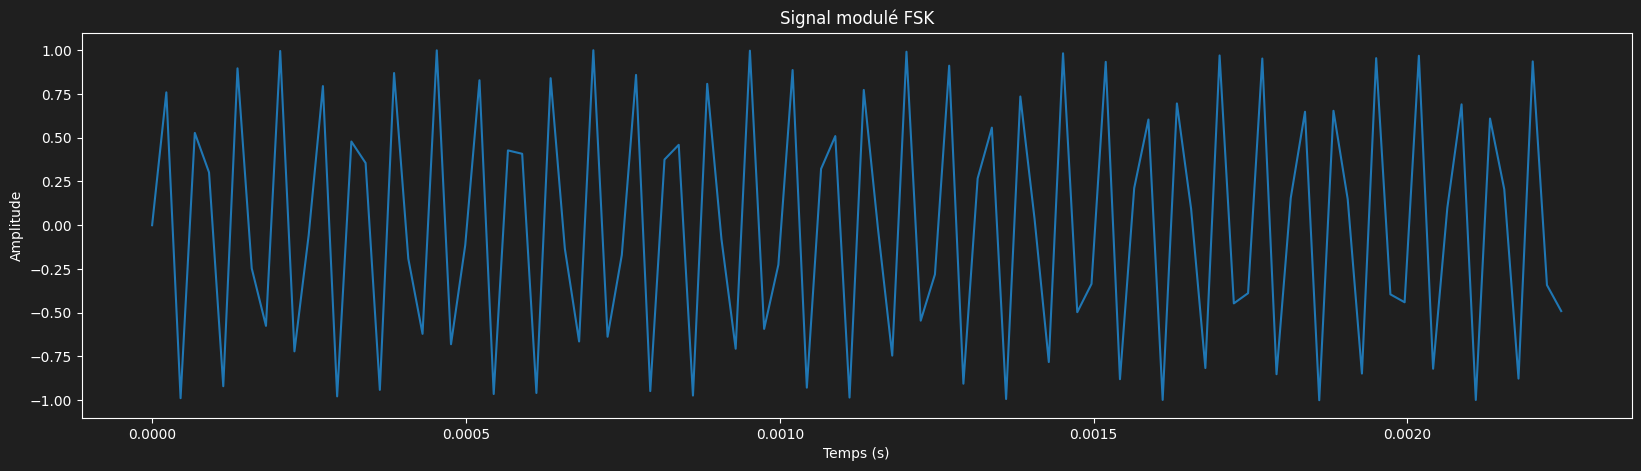

In [9]:
f0, f1 = 16000, 18000
def modulation_fsk(binaire, duree_bit, f0, f1, echantillonage):
    signal = []
    temps = []
    for i, bit in enumerate(binaire):
        t = np.linspace(
            i * duree_bit, 
            (i + 1) * duree_bit, 
            int(echantillonage * duree_bit),
            endpoint=False
        )
        if bit == '1':
            # Onde à fréquence f1 (bit 1)
            s = np.sin(2 * np.pi * f1 * t)
        else:
            # Onde à fréquence f0 (bit 0)
            s = np.sin(2 * np.pi * f0 * t)
        
        signal.extend(s)
        temps.extend(t)
    
    return np.array(temps), np.array(signal)

Ns = len(manchester)
temps, FSK = modulation_fsk(manchester, duree_bit, f0, f1, echantillonage)
plt.figure(figsize=(20, 5), facecolor="#1f1f1f")
plt.plot(temps[:100], FSK[:100])  # Affiche une petite portion du signal
plt.title("Signal modulé FSK", color="white")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
ax = plt.gca()
graphique(ax)
plt.show()

#sd.play(signal_ultrasonique, samplerate=44100)


<div style="display: flex; width: 98%;">
    <p style="font-size: 25px; text-align: justify;">En situation réel des signaux extérieur peuvent venir s'ajouter au signal d'origine et par ainsi dire le perturber et rendre sa lecture plus difficile. Nous allons donc simuler des signaux perturbateurs.</p>
</div>

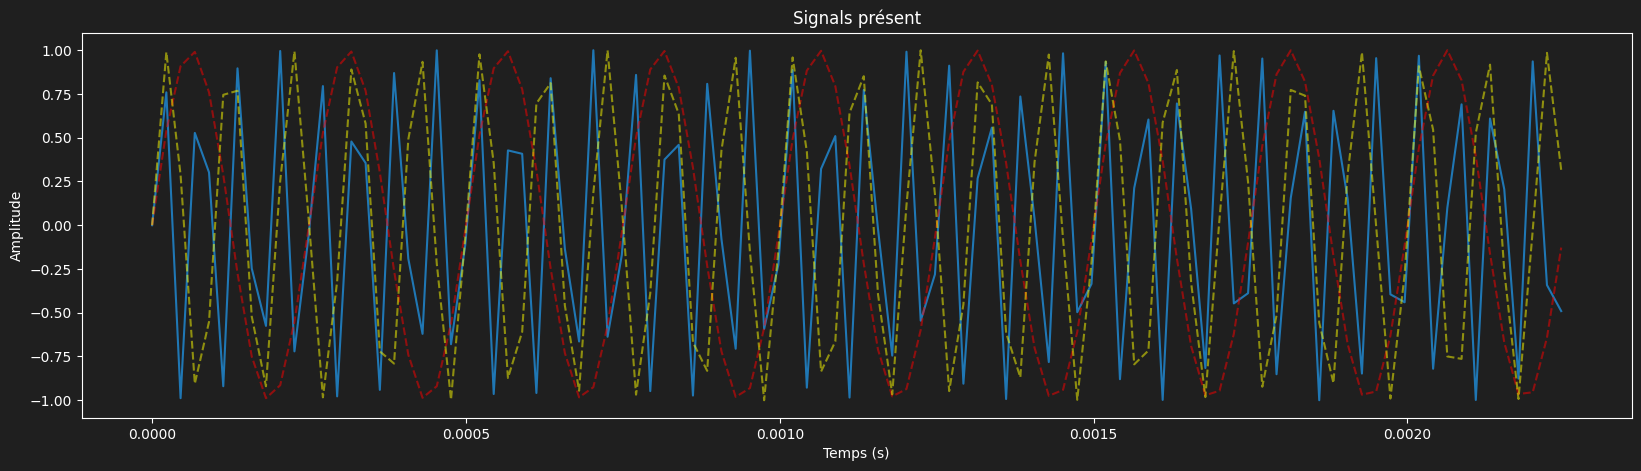

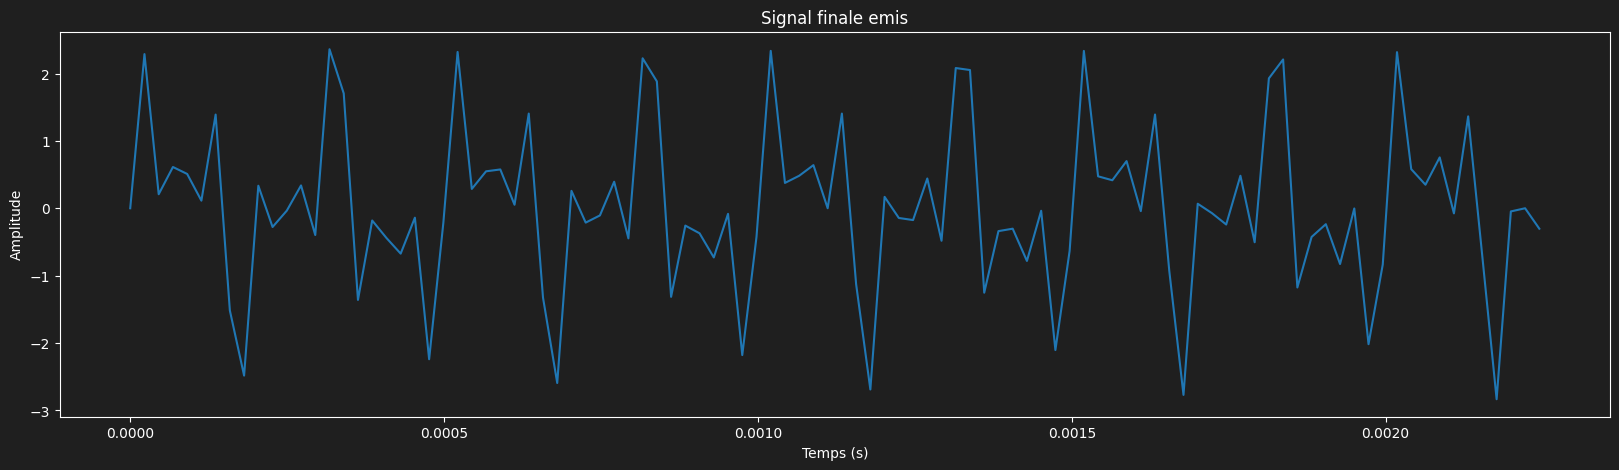

In [10]:
f2, f3 = 4000, 10000
sin1 = np.sin(2 * np.pi * f2 * temps)

sin1 = np.sin(2 * np.pi * f2 * temps)
sin2 = np.sin(2 * np.pi * f3 * temps)
signal_emis = FSK + sin1 + sin2

plt.figure(figsize=(20, 5), facecolor="#1f1f1f")
plt.plot(temps[:100], FSK[:100])
plt.plot(temps[:100], sin1[:100], color="red", linestyle="dashed", alpha=0.5)
plt.plot(temps[:100], sin2[:100], color="yellow", linestyle="dashed", alpha=0.5)
plt.title("Signals présent", color="white")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
ax = plt.gca()
graphique(ax)
plt.show()


plt.figure(figsize=(20, 5), facecolor="#1f1f1f")
plt.plot(temps[:100], signal_emis[:100])
plt.title("Signal finale emis", color="white")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
ax = plt.gca()
graphique(ax)
plt.show()

<br>
<hr style="background-color: #77B5FE; height: 2px; border: none;">
<center><h2 style="font-size: 33px;"><u>Réception du signal:</u></h2></center>
<div style="display: flex; width: 98%;">
    <p style="font-size: 25px; text-align: justify;">Désormais que le signal à été émis par l'agent sur le réseau des cybercriminel il peut enfin être capté par les antennes réseaux de l'agence. Voici désormais la chaine de réception du signal capté:</p>
</div>
<br>
<center><img src="chaine.png" alt="chaine logo" style="height: 800px;"></center>


<center><h2 style="font-size: 33px;"><u>Filtre passe-bande:</u></h2></center>
<center><p style="font-size: 25px;">On utilise un filtre passe-bande pour isoler notre signal des autres signaux capter par l'antenne afin de pouvoir travailler dessus et le décoder.</p></center>
<center><p style="font-size: 25px;">Ici le filtre passe bande laissera passer les fréquences entre 16kHz et 18kHz.</p></center>



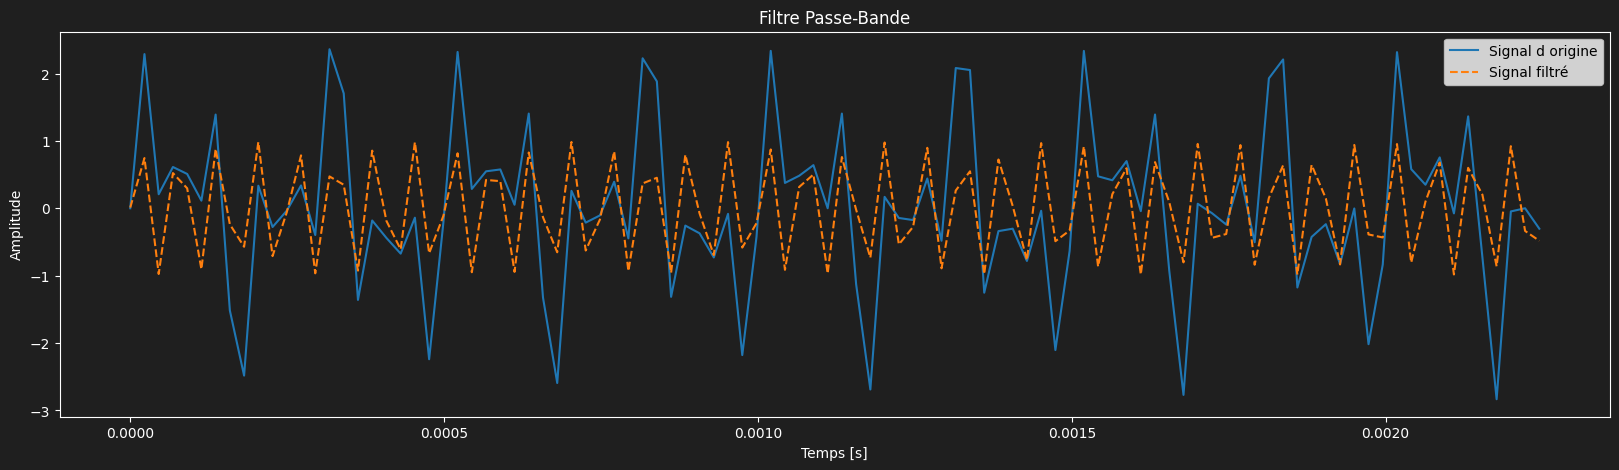

In [11]:
import scipy.signal as signal

def passe_bande(message, f0, f1, fs, ordre=4):
    nyquist = 0.5 * fs                                                           # Fréquence de Nyquist
    basse = f0 / nyquist                                                         # On définis la fréquence basse
    haute = f1 / nyquist                                                         # On définis la fréquence haute
    b, a = signal.butter(ordre, [basse, haute], btype='band')                    # Conception du filtre passe-bande avec scipy
    filtre = signal.filtfilt(b, a, message)                                      # Filtre passe-bande de la bibliothèque scipy
    return filtre

# Filtrage
signal_filtre = passe_bande(signal_emis, 15000, 19000, 44100)

# Affichage
plt.figure(figsize=(20,5), facecolor="#1f1f1f")
plt.plot(temps[:100], signal_emis[:100], label='Signal d origine')
plt.plot(temps[:100], signal_filtre[:100], label='Signal filtré', linestyle='dashed')
plt.xlabel('Temps [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Filtre Passe-Bande', color="white")
ax = plt.gca()
graphique(ax)
plt.show()

<center><p style="font-size: 25px;">Désormais nous avons la fraction de signal que nous souhaitions, nous pouvons donc procéder à la démodulation du signal FSK.</p></center>
<center><h2 style="font-size: 33px;"><u>Démodulation FSK:</u></h2></center>

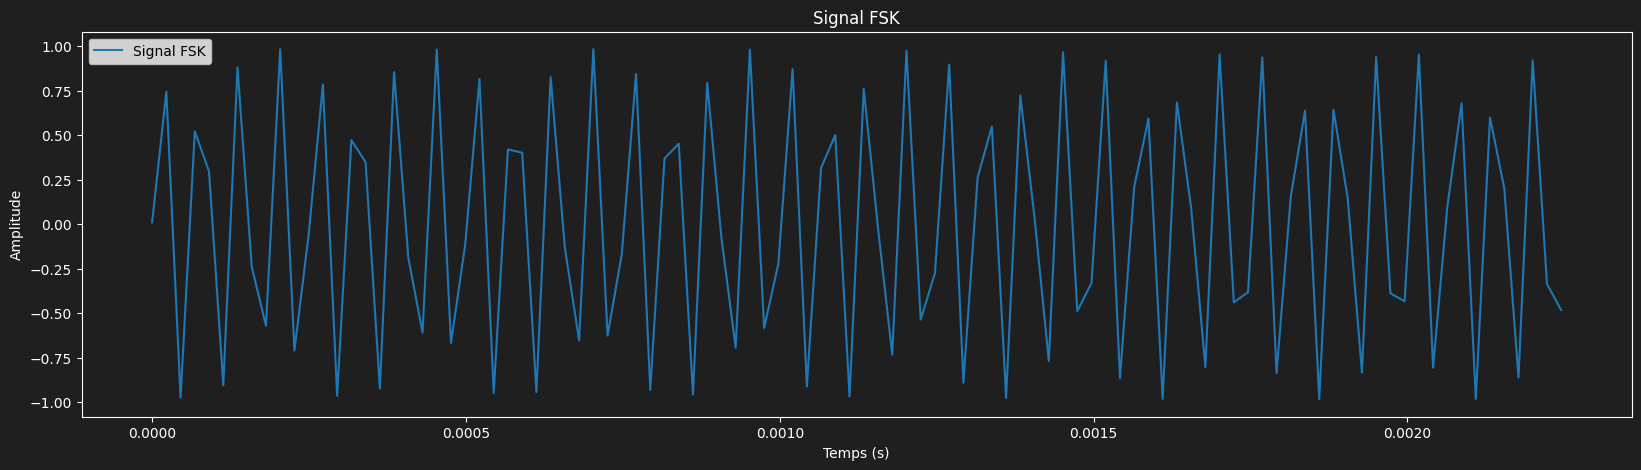

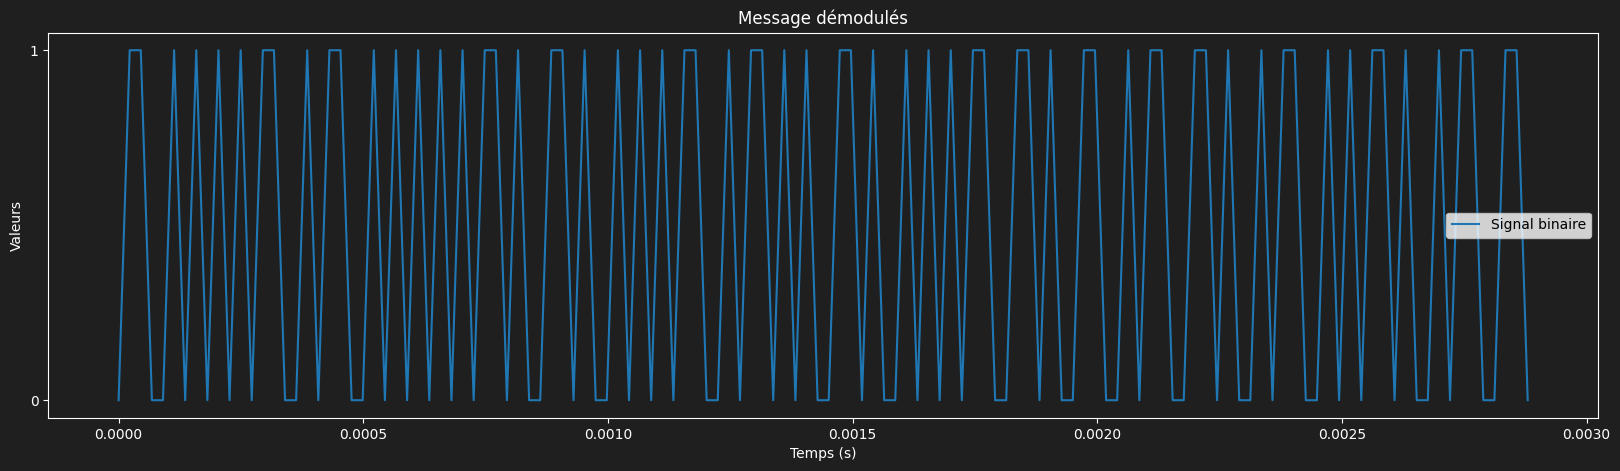

Bits originaux     : 01100101010101100101100101010101011010011010010101011001011010100110100101010110011010011001011001101001011001010110100101100110
Bits démodulés     : 01100101010101100101100101010101011010011010010101011001011010100110100101010110011010011001011001101001011001010110100101100110


In [ ]:

# Démodulation FSK
def demodulation_fsk(signal_fsk, f0, f1, fs, T_symbol):
    nbr_symbole = len(signal_fsk) // int(T_symbol * fs)                                     # On calcule le nombre de symbole
    demodulated_bits = []

    for i in range(nbr_symbole):
        debut = int(i * T_symbol * fs)
        fin = int((i + 1) * T_symbol * fs)
        segment = signal_fsk[debut:fin]

        # Corrélation avec les fréquences F0 et F1
        t_segment = np.linspace(0, T_symbol, len(segment), endpoint=False)
        reference_f0 = np.sin(2 * np.pi * f0 * t_segment)
        reference_f1 = np.sin(2 * np.pi * f1 * t_segment)

        energy_f0 = np.sum(segment * reference_f0)
        energy_f1 = np.sum(segment * reference_f1)

        demodulated_bits.append(1 if energy_f1 > energy_f0 else 0)

    return np.array(demodulated_bits)

# Récupération des bits démodulés
message_demodule = demodulation_fsk(signal_filtre, 16000, 18000, 44100, 0.01)
message_demodule = ''.join(map(str, message_demodule))
message_graphique = [int(bit) for bit in message_demodule]

# Affichage des résultats
plt.figure(figsize=(20, 5), facecolor="#1f1f1f")
plt.plot(temps[:100], signal_filtre[:100], label="Signal FSK")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.title("Signal FSK", color="white")
plt.legend()
ax = plt.gca()
graphique(ax)
plt.show()

plt.figure(figsize=(20, 5), facecolor="#1f1f1f")
plt.step(temps[:len(message_graphique)], message_graphique, label="Signal binaire")
plt.xlabel("Temps (s)")
plt.ylabel("Valeurs")
plt.title("Message démodulés", color="white")
plt.yticks([0, 1])
plt.legend()
ax = plt.gca()
graphique(ax)
plt.show()

print("Bits originaux     :", manchester)
print("Bits démodulés     :", message_demodule)


<center><p style="font-size: 25px;">Maintenant que nous avons notre signal démodulé en binaire qui correspond bien à celui transmis (codé), il nous reste à le décodé en Manchester.</p></center>
<center><h2 style="font-size: 33px;"><u>Décodage Manchester:</u></h2></center>

Bits d'origine :  0100000100100000011011000010011101100001011010010110010001100101
Bits décodée   :  0100000100100000011011000010011101100001011010010110010001100101


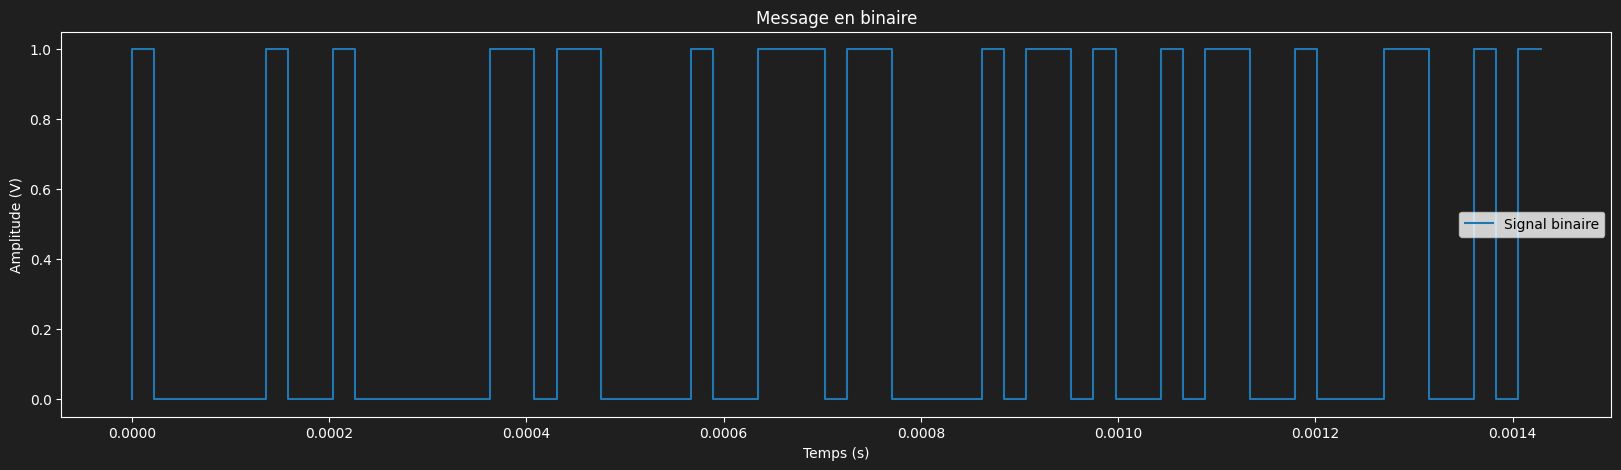

In [13]:
def decode_manchester(encoded_str):
    decoded_bits = []
    # On parcourt chaque paire de bits
    for i in range(0, len(encoded_str), 2):
        # Si on rencontre '01' -> c'est un '1'
        if encoded_str[i:i+2] == '10':
            decoded_bits.append('1')
        # Si on rencontre '10' -> c'est un '0'
        elif encoded_str[i:i+2] == '01':
            decoded_bits.append('0')
    # On retourne la chaîne binaire décodée
    return ''.join(decoded_bits)

# Exemple d'utilisation
message_decode = decode_manchester(message_demodule)
print("Bits d'origine : ", binaire)
print("Bits décodée   : ", message_decode)

message_graphique = [int(bit) for bit in message_decode]
plt.figure(figsize=(20, 5), facecolor="#1f1f1f")
plt.step(temps[:len(message_graphique)], message_graphique, label="Signal binaire")
plt.title("Message en binaire", color="white")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude (V)")
plt.legend()
ax = plt.gca()
graphique(ax)

<center><p style="font-size: 25px;">Nous avons enfin le message binaire de départ il nous reste plus qu'à le transformer en texte.</p></center>
<center><h2 style="font-size: 33px;"><u>Décodage ASCII:</u></h2></center>

In [14]:
def binaire_to_text(binaire):
    # Diviser la chaîne binaire en morceaux de 8 bits
    ascii_chars = []
    for i in range(0, len(binaire), 8):
        byte = binaire[i:i+8]
        # Convertir chaque bloc de 8 bits en un caractère ASCII
        ascii_char = chr(int(byte, 2))  # int(byte, 2) convertit le binaire en entier, puis chr() convertit en caractère
        ascii_chars.append(ascii_char)
    
    # Retourner le texte décodé
    return ''.join(ascii_chars)

# Exemple d'utilisation
texte_finale = binaire_to_text(message_decode)
print("Texte décodé : ", texte_finale)


Texte décodé :  A l'aide
